# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 2: Simple Pendulum
## 02.19.2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats

In [2]:
sns.set_style(style='whitegrid')

In [22]:
linearity = 'nonlinear'
# Length of pendulum L
L = 1.5
# Damping coefficient q
q = 0.05
# Driving frequencey Omega_D
Omega_D = 0
# Driving amplitude F_D
F_D = 0
# Theta(0)
theta = 20
theta *= np.pi/180
# Omega(ω)
omega = 0
# Integration time t_max
t_max = 20

mode_runge = ('..\Release\pendulum.exe ' +
              linearity + ' ' +
              'runge' + ' ' +
              str(L) + ' ' +
              str(q) + ' ' +
              str(Omega_D) + ' ' +
              str(F_D) + ' ' +
              str(theta) + ' ' +
              str(omega) + ' ' +
              str(t_max)
             )
mode_karp = ('..\Release\pendulum.exe ' +
              linearity + ' ' +
              'karp' + ' ' +
              str(L) + ' ' +
              str(q) + ' ' +
              str(Omega_D) + ' ' +
              str(F_D) + ' ' +
              str(theta) + ' ' +
              str(omega) + ' ' +
              str(t_max)
             )
mode_euler = ('..\Release\pendulum.exe ' +
              linearity + ' ' +
              'euler' + ' ' +
              str(L) + ' ' +
              str(q) + ' ' +
              str(Omega_D) + ' ' +
              str(F_D) + ' ' +
              str(theta) + ' ' +
              str(omega) + ' ' +
              str(t_max)
             )

In [23]:
os.system(mode_runge)
data_runge = np.genfromtxt('pendulum.dat')

os.system(mode_karp)
data_karp = np.genfromtxt('pendulum.dat')

os.system(mode_euler)
data_euler = np.genfromtxt('pendulum.dat')

In [9]:
steps = 1
image_dpi = 150
image_format = 'pdf'

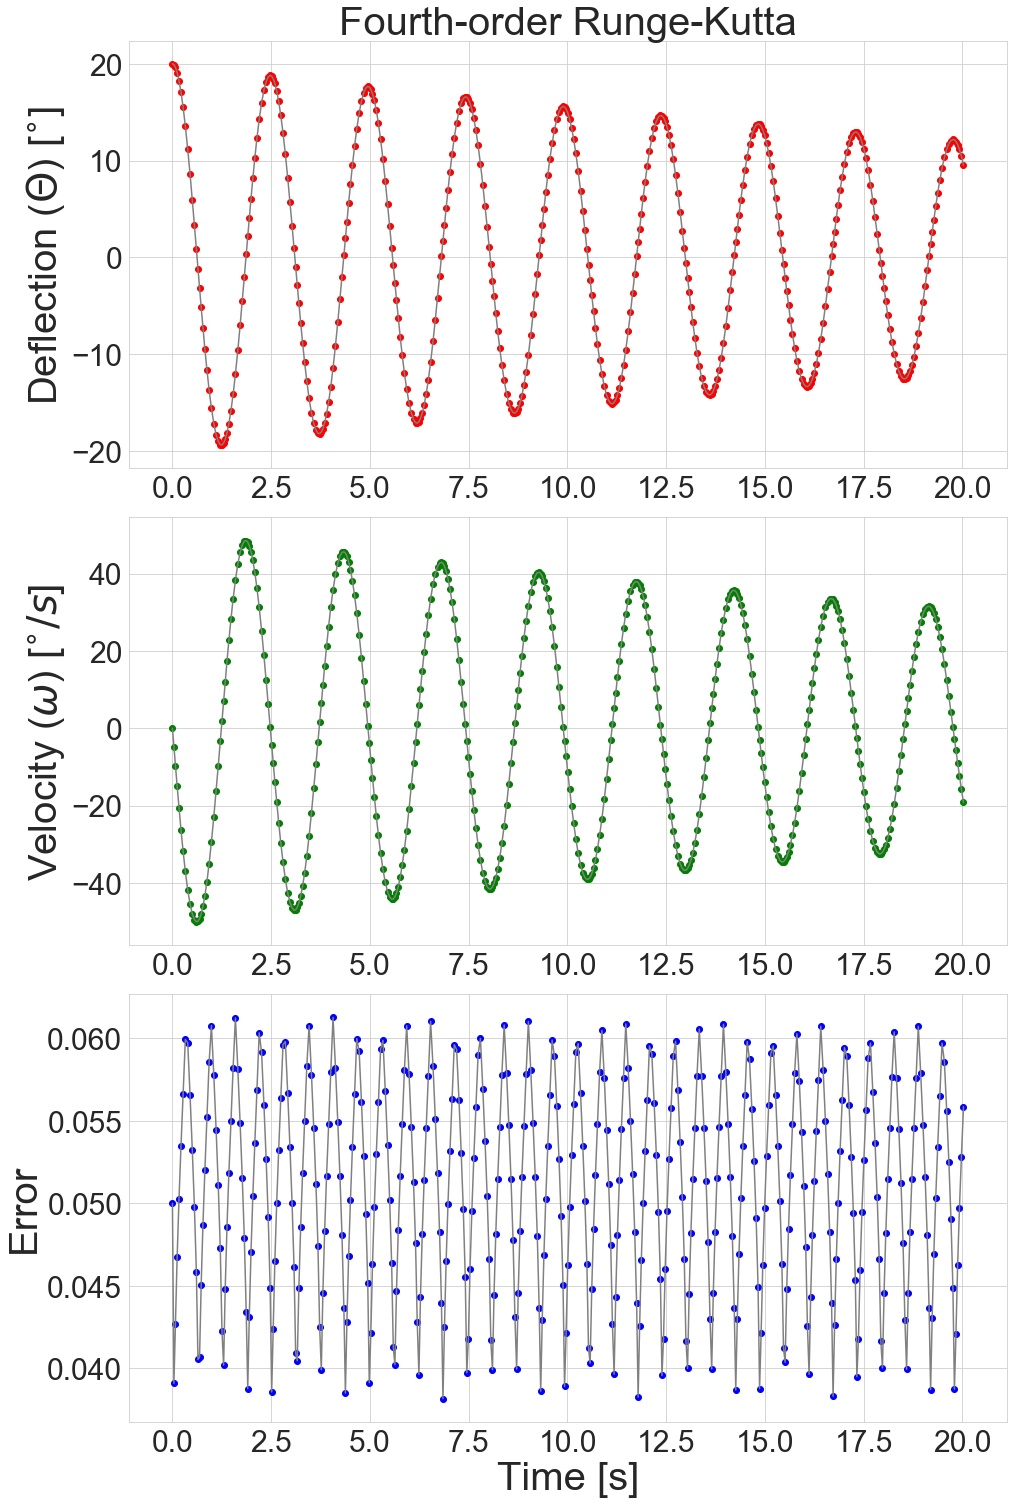

In [16]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_runge[::steps,0], data_runge[::steps,1]*180/np.pi, color='grey')
axes[1].plot(data_runge[::steps,0], data_runge[::steps,2]*180/np.pi, color='grey')
axes[2].plot(data_runge[::steps,0], data_runge[::steps,3], color='grey')

axes[0].scatter(data_runge[::steps,0], data_runge[::steps,1]*180/np.pi, color='red')
axes[1].scatter(data_runge[::steps,0], data_runge[::steps,2]*180/np.pi, color='green')
axes[2].scatter(data_runge[::steps,0], data_runge[::steps,3], color='blue')

axes[0].set_title('Adaptive fourth-order Runge-Kutta', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$^{\circ}$]', fontsize=40)
axes[1].set_ylabel('Velocity ($\omega$) [$^{\circ}/s$]', fontsize=40)

axes[2].set_xlabel('Time [s]', fontsize=40)
axes[2].set_ylabel('Error', fontsize=40)


axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[2].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_runge.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

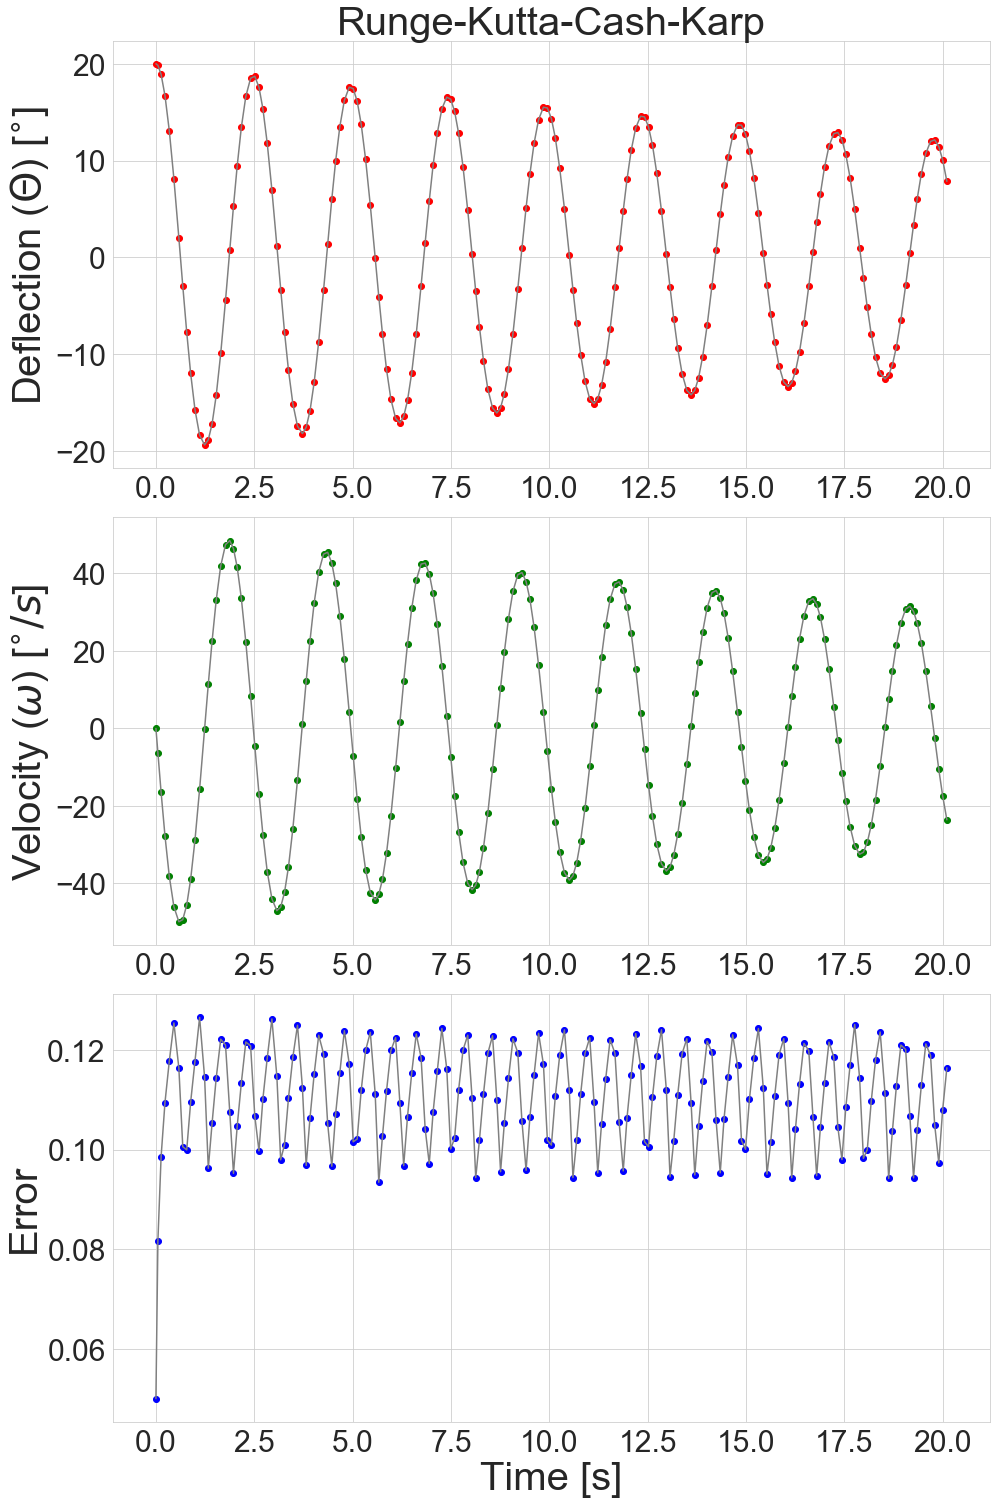

In [17]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_karp[::steps,0], data_karp[::steps,1]*180/np.pi, color='grey')
axes[1].plot(data_karp[::steps,0], data_karp[::steps,2]*180/np.pi, color='grey')
axes[2].plot(data_karp[::steps,0], data_karp[::steps,3], color='grey')

axes[0].scatter(data_karp[::steps,0], data_karp[::steps,1]*180/np.pi, color='red')
axes[1].scatter(data_karp[::steps,0], data_karp[::steps,2]*180/np.pi, color='green')
axes[2].scatter(data_karp[::steps,0], data_karp[::steps,3], color='blue')

axes[0].set_title('Adaptive Runge-Kutta-Cash-Karp', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$^{\circ}$]', fontsize=40)
axes[1].set_ylabel('Velocity ($\omega$) [$^{\circ}/s$]', fontsize=40)

axes[2].set_xlabel('Time [s]', fontsize=40)
axes[2].set_ylabel('Error', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[2].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_karp.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

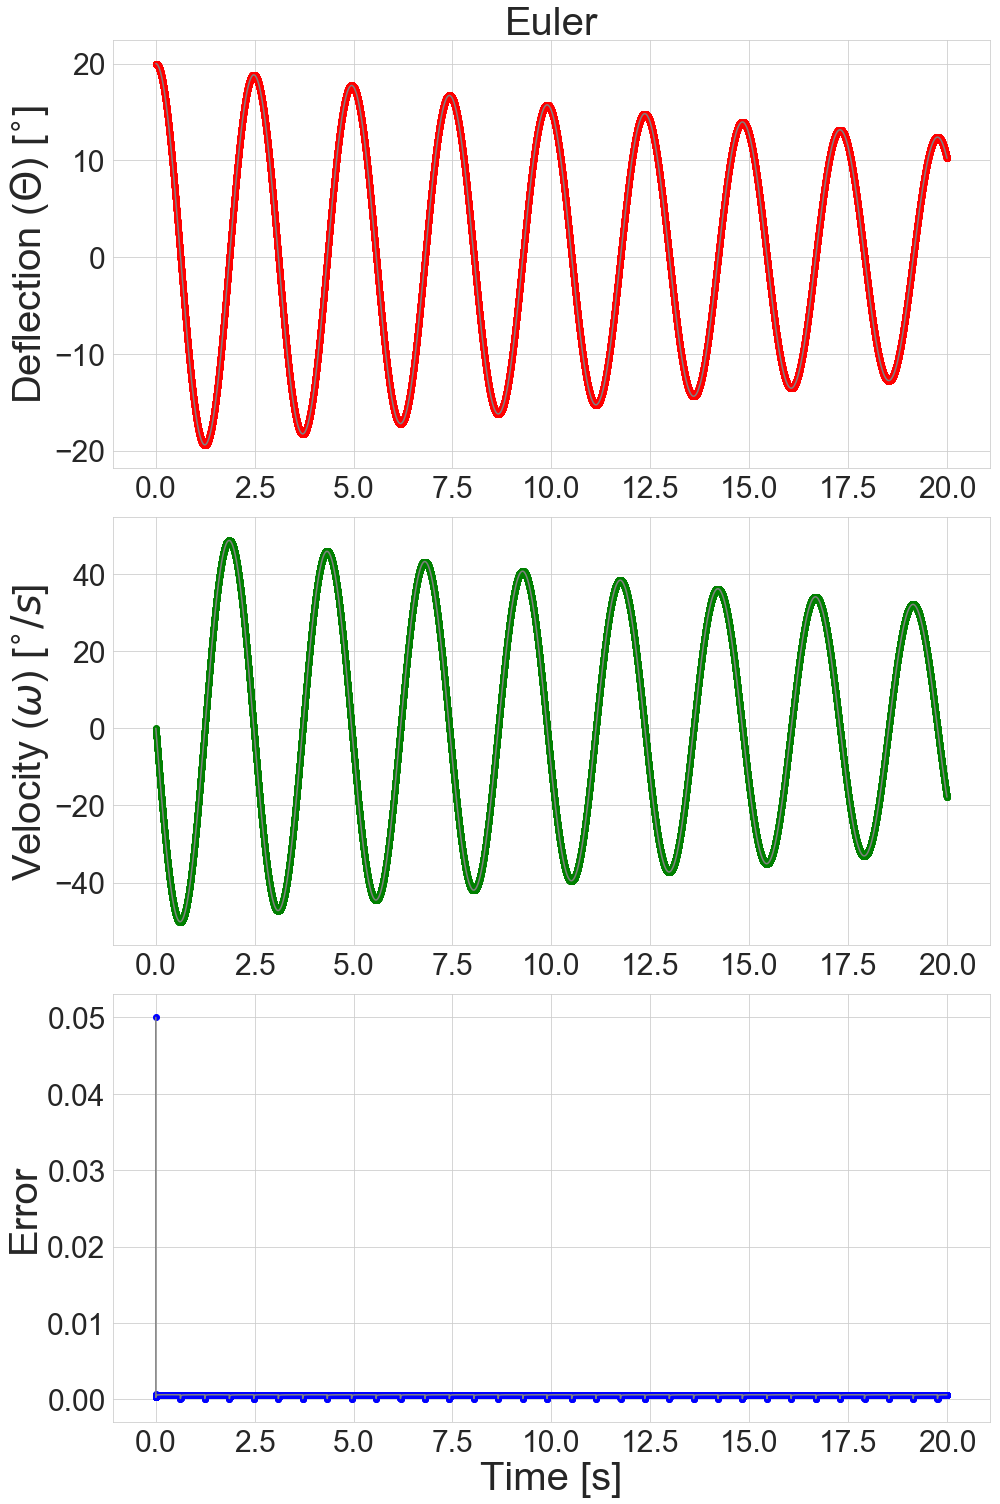

In [18]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_euler[::steps,0], data_euler[::steps,1]*180/np.pi, color='grey')
axes[1].plot(data_euler[::steps,0], data_euler[::steps,2]*180/np.pi, color='grey')
axes[2].plot(data_euler[::steps,0], data_euler[::steps,3], color='grey')

axes[0].scatter(data_euler[::steps,0], data_euler[::steps,1]*180/np.pi, color='red')
axes[1].scatter(data_euler[::steps,0], data_euler[::steps,2]*180/np.pi, color='green')
axes[2].scatter(data_euler[::steps,0], data_euler[::steps,3], color='blue')

axes[0].set_title('Euler', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$^{\circ}$]', fontsize=40)
axes[1].set_ylabel('Velocity ($\omega$) [$^{\circ}/s$]', fontsize=40)

axes[2].set_xlabel('Time [s]', fontsize=40)
axes[2].set_ylabel('Error', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[2].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_euler.' + image_format, format=image_format, dpi=image_dpi)
plt.show()